In [24]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

a = tf.Variable(10, name = 'a')
b = tf.Variable(4, name = 'b')
two = tf.constant(2)

f = tf.add(tf.multiply(a,b), two)
#f1 = a*b + 2

In [25]:
print(f)
#print(f1)

Tensor("Add_3:0", shape=(), dtype=int32)


In [26]:
sess = tf.Session()
init = tf.global_variables_initializer()

In [27]:
print(tf.__version__)

1.15.0


In [28]:
# sess.run(init)
# result = sess.run(f)
# print(result)
# sess.close()

In [29]:
LOGDIR="/home/vavi/Dokumente/NN-Buch/Kapitel8/TensorBoard"
with sess:
    writer = tf.summary.FileWriter(LOGDIR,sess.graph)
    sess.run(init)
    result = sess.run(f)
    print(result)

42


In [30]:
tf.reset_default_graph()

with tf.name_scope("Multiplikation"):
    a = tf.Variable(10, name = 'a')
    b = tf.Variable(4, name = 'b')
    mult = tf.multiply(a,b)
    
with tf.name_scope("Addition"):
    two = tf.constant(2)
    f = tf.add(mult, two)
    
LOGDIR = "/home/vavi/Dokumente/NN-Buch/Kapitel8/TensorBoard/first_graph"

sess = tf.Session()
init = tf.global_variables_initializer()

with sess:
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    sess.run(init)
    result = sess.run(f)
    print(result)

42


In [44]:
tf.reset_default_graph()

with tf.name_scope("Klammer"):
    a = tf.Variable(10.0, name = 'a')
    b = tf.Variable(4.0, name = 'b')
    five = tf.constant(5.0)
    term1 = tf.add(tf.add(a,b), five)
    
with tf.name_scope("Wurzel"):
    c = tf.Variable(9.0, name ='c')
    term2 = tf.sqrt(c)
    
with tf.name_scope("Funktion_f"):
    f = tf.add(term1, term2)
    
LOGDIR = "/home/vavi/Dokumente/NN-Buch/Kapitel8/TensorBoard/first_graph_aufgabe"

sess = tf.Session()
init = tf.global_variables_initializer()

with sess:
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    sess.run(init)
    result = sess.run(f)
    print(result)

22.0


In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape Trainingsdaten: {}". format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr. 5 {}".format(train_labels[5]))

Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Label zu Bild Nr. 5 2


In [33]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

In [34]:
print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))

Trainingsdatensatz:(60000, 28, 28, 1)
Testdatensatz:(10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


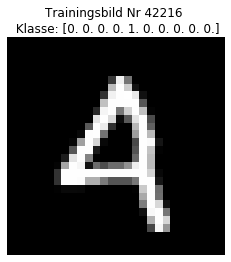

In [35]:
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,60000)
plttitle = "Trainingsbild Nr {} \n Klasse: {}".format(randindex, train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [36]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [45]:
# Die Netzwerkarchitektur
model = Sequential()
# Detektionsteil
model.add(Conv2D(32, kernel_size=(3,3),
                activation = 'relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2 
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Identifikationsteil
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
features (Dense)             (None, 128)               2

In [46]:
model.compile(loss='categorical_crossentropy',
            optimizer='Adam',
             metrics=['accuracy'])

In [47]:
LOGDIR="/home/vavi/Dokumente/NN-Buch/Kapitel8/TensorBoard/CNN_aufgabe"
my_tensorboard = TensorBoard(log_dir = LOGDIR,
                            histogram_freq = 0,
                            write_graph = True,
                            write_images= True)
# Hyperparameter
my_batch_size = 128
my_num_classes = 10
my_epochs = 12

history = model.fit(train_images, train_labels,
                   batch_size=my_batch_size,
                   callbacks=[my_tensorboard],
                   epochs=my_epochs,
                   verbose=1,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 483us/sample - loss: 0.2581 - acc: 0.9205 - val_loss: 0.0592 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 28s 464us/sample - loss: 0.0767 - acc: 0.9762 - val_loss: 0.0400 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 28s 468us/sample - loss: 0.0590 - acc: 0.9811 - val_loss: 0.0315 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 28s 471us/sample - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 29s 480us/sample - loss: 0.0411 - acc: 0.9868 - val_loss: 0.0286 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0367 - acc: 0.9879 - val_loss: 0.0311 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 29s 479us/sample - loss: 0.0326 - acc: 0.9891 

In [42]:
score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

10000/10000 [==============================] - 2s 244us/sample - loss: 0.0209 - acc: 0.9940
Test Verlust: 0.020903570574127298
Test Genauigkeit: 0.994


### Model speichern

In [43]:
from tensorflow.keras import models
model.save("SimpleCNN_MNIST.h5")

### Model laden

In [66]:
from tensorflow.keras.models import load_model
new_model = load_model('SimpleCNN_MNIST.h5')
prediction = new_model.predict(test_images)